## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2021

**Дедлайн**:   21:00 28 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [2]:
def task_1(arr):
    arr = np.asarray(arr)
    return np.all(arr > 0)

In [3]:
assert(task_1([12, 34, 9, 1, 1, 9]) == True)
assert(task_1([1, 1, 1, 0]) == False)
assert(task_1([0, 0, 0, 0, 0]) == False)
assert(task_1([]) == True)
assert(task_1([1, 1, 1, 1, -1]) == False)

__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [4]:
def task_2(arr, n):
    arr = np.asarray(arr)
    return np.repeat(arr, n)

In [5]:
assert(np.all(task_2([1, 2, 3], 3) == [1, 1, 1, 2, 2, 2, 3, 3, 3]))
assert(np.all(task_2([1], 10) == [1 for _ in range(10)]))
assert(np.all(task_2([1, 2, 1], 2) == [1, 1, 2, 2, 1, 1]))
assert(np.all(task_2([], 20) == []))
assert(np.all(task_2([-10, 14, 100], 5) == [-10, -10, -10, -10, -10, 14, 14, 14, 14, 14, 100, 100, 100, 100, 100]))

__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [6]:
def task_3(V, v):
    V = np.asarray(V)
    v = np.asarray(v)
    pre_result = np.asarray(np.split(V, np.cumsum(v)), dtype=object)
    my_sum = np.vectorize(np.sum)
    return my_sum(pre_result).ravel()[:len(v)]

In [7]:
V = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
assert(np.all(task_3(V, [2, 1, 3]) == [3, 3, 15]))
assert(np.all(task_3(V, [1, 1, 1]) == [1, 2, 3]))
assert(np.all(task_3(V, [5, 4]) == [15, 30]))
assert(np.all(task_3(V, [5, 5]) == [15, 40]))
assert(np.all(task_3(V, [10]) == [55]))

Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(e, i) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

In [9]:
data.head()

,text,is_train,label_id
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14


In [10]:
label_names.head()

,label_name,label_id
0,alt.atheism,0
1,comp.graphics,1
2,comp.os.ms-windows.misc,2
3,comp.sys.ibm.pc.hardware,3
4,comp.sys.mac.hardware,4


__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [11]:
new_df = data.merge(label_names, on=['label_id'])
new_df.drop(['label_id'], axis=1, inplace=True)
print('Train: ', len(new_df[new_df['is_train'] == True]))
print('Test: ', len(new_df[new_df['is_train'] == False]))
assert(len(new_df[new_df['is_train'] == True]) + len(new_df[new_df['is_train'] == False]) == len(new_df))

Train:  11314
Test:  7532


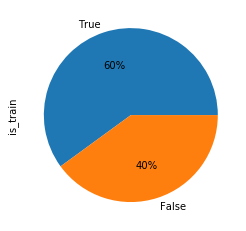

In [12]:
new_df['is_train'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [13]:
new_df.head()

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,True,rec.autos
2,From: jimf@centerline.com (Jim Frost)\nSubject...,True,rec.autos
3,From: eliot@lanmola.engr.washington.edu (eliot...,True,rec.autos
4,From: sjp@hpuerca.atl.hp.com (Steve Phillips)\...,True,rec.autos


__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [14]:
import re


def preprocess(text):    
    text = text.lower()
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text.strip()
    return text.split()

def task_5():
    new_df['pp_text'] = new_df['text'].apply(preprocess)

In [15]:
text = '''
МОЯ компания...INC

Old Wine Pvt

мастер-разум ООО

ООО "Апекс-Лабс",,,,, 'yui'

"Индия-Новая Корпорация"

Индоамериканская пвт / лтд
'''
preprocess(text)

['inc', 'old', 'wine', 'pvt', 'yui']

In [16]:
task_5()

In [17]:
new_df.head()

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,True,rec.autos,"[from, cpkjp, vm, cc, latech, edu, kevin, park..."
2,From: jimf@centerline.com (Jim Frost)\nSubject...,True,rec.autos,"[from, jimf, centerline, com, jim, frost, subj..."
3,From: eliot@lanmola.engr.washington.edu (eliot...,True,rec.autos,"[from, eliot, lanmola, engr, washington, edu, ..."
4,From: sjp@hpuerca.atl.hp.com (Steve Phillips)\...,True,rec.autos,"[from, sjp, hpuerca, atl, hp, com, steve, phil..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [18]:
from collections import Counter

vocabulary = Counter()

def task_6():
    for val in new_df[new_df['is_train']]['pp_text']:
        vocabulary.update(val)
    print('Unique words:', len(vocabulary.items()))
    most_common = vocabulary.most_common()
    fig, axes = plt.subplots(2, 1)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    axes[0].bar(list(map(lambda x:x[0], most_common[:20])), list(map(lambda x:x[1], most_common[:20])))
    temp_df = pd.DataFrame(most_common, columns=['word', 'freq'])
    temp_df['len_word'] = temp_df['word'].apply(len)
    temp_df['one_letter'] = temp_df['word'].apply(lambda x: True if len(x.replace(x[0], '')) == 0 else False)
    temp_df.drop(temp_df[(temp_df['freq'] > 9000) | 
                         (temp_df['freq'] < 3) |
                         (temp_df['one_letter']) |
                         (temp_df['len_word'] < 3) |
                         (temp_df['len_word'] > 20)
                        ].index, inplace=True)
    temp_df.drop(['len_word', 'one_letter'], axis=1, inplace=True)
    new_voc = temp_df.values
    new_dict = dict(new_voc)
    print("Unique word after filtering:", len(new_voc))
    axes[1].bar(list(map(lambda x:x[0], new_voc[:20])), list(map(lambda x:x[1], new_voc[:20])))
    return new_dict

Unique words: 89038
Unique word after filtering: 39126


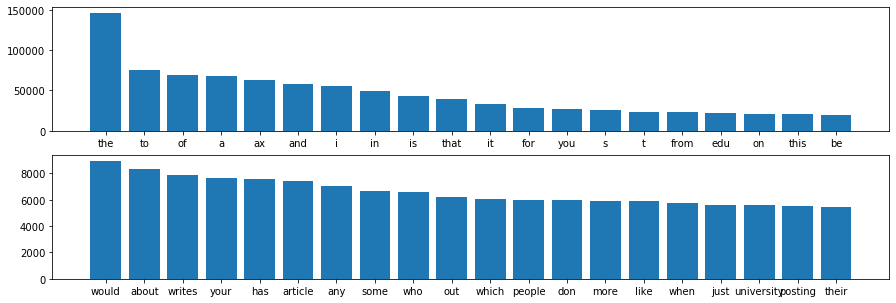

In [19]:
dict_ = task_6()

In [20]:
vocabulary = dict_

__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    vectorizer = CountVectorizer(vocabulary=dict_.keys())
    train = [' '.join(preprocess(val)) for val in data[data['is_train']]['text']]
    test = [' '.join(preprocess(val)) for val in data[data['is_train'] != True]['text']]
    vectorizer.fit(train)
    assert len(vectorizer.vocabulary_) == len(vocabulary)
    return vectorizer.transform(train), vectorizer.transform(test)

In [22]:
train, test = task_7()

In [23]:
train.shape, test.shape

((11314, 39126), (7532, 39126))

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.utils import shuffle

def task_8():
    clf = LogisticRegression()
    f1 = make_scorer(f1_score , average='macro')
    params = {
        'C': np.linspace(0.2, 5, 10),
        'solver': ['liblinear']
    }
    grid = GridSearchCV(clf, params, scoring=f1, cv=3, verbose=1)
    X_train, y_train = train, data[data['is_train']]['label_id']
    X_test, y_test = test, data[data['is_train'] != True]['label_id']
    grid.fit(X_train, y_train)
    print(grid.best_params_, grid.best_score_)    
    clf = LogisticRegression(**grid.best_params_)
    clf.fit(X_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))
    print("F1_macro: ", f1_score(y_test, clf.predict(X_test), average='macro'))
    print("F1_micro: ", f1_score(y_test, clf.predict(X_test), average='micro'))
    return clf, grid.best_params_

In [30]:
clf, params = task_8()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 0.7333333333333334, 'solver': 'liblinear'} 0.883765628211911
Accuracy:  0.8035050451407328
F1_macro:  0.797160348917944
F1_micro:  0.8035050451407327


In [26]:
params = {
    'C': 0.7333,
    'solver': 'liblinear'
}
clf = LogisticRegression(**params)
X_train, y_train = train, data[data['is_train']]['label_id']
X_test, y_test = test, data[data['is_train'] != True]['label_id']
clf.fit(X_train, y_train)

LogisticRegression(C=0.7333, solver='liblinear')

__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

def task_9():
    fig, axes = plt.subplots(2, 1, figsize=(40, 40))
    plot_confusion_matrix(clf, X_test, y_test, ax=axes[0], normalize='true')
    plot_confusion_matrix(clf, X_test, y_test, ax=axes[1])


C:\Users\vdtri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vdtri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


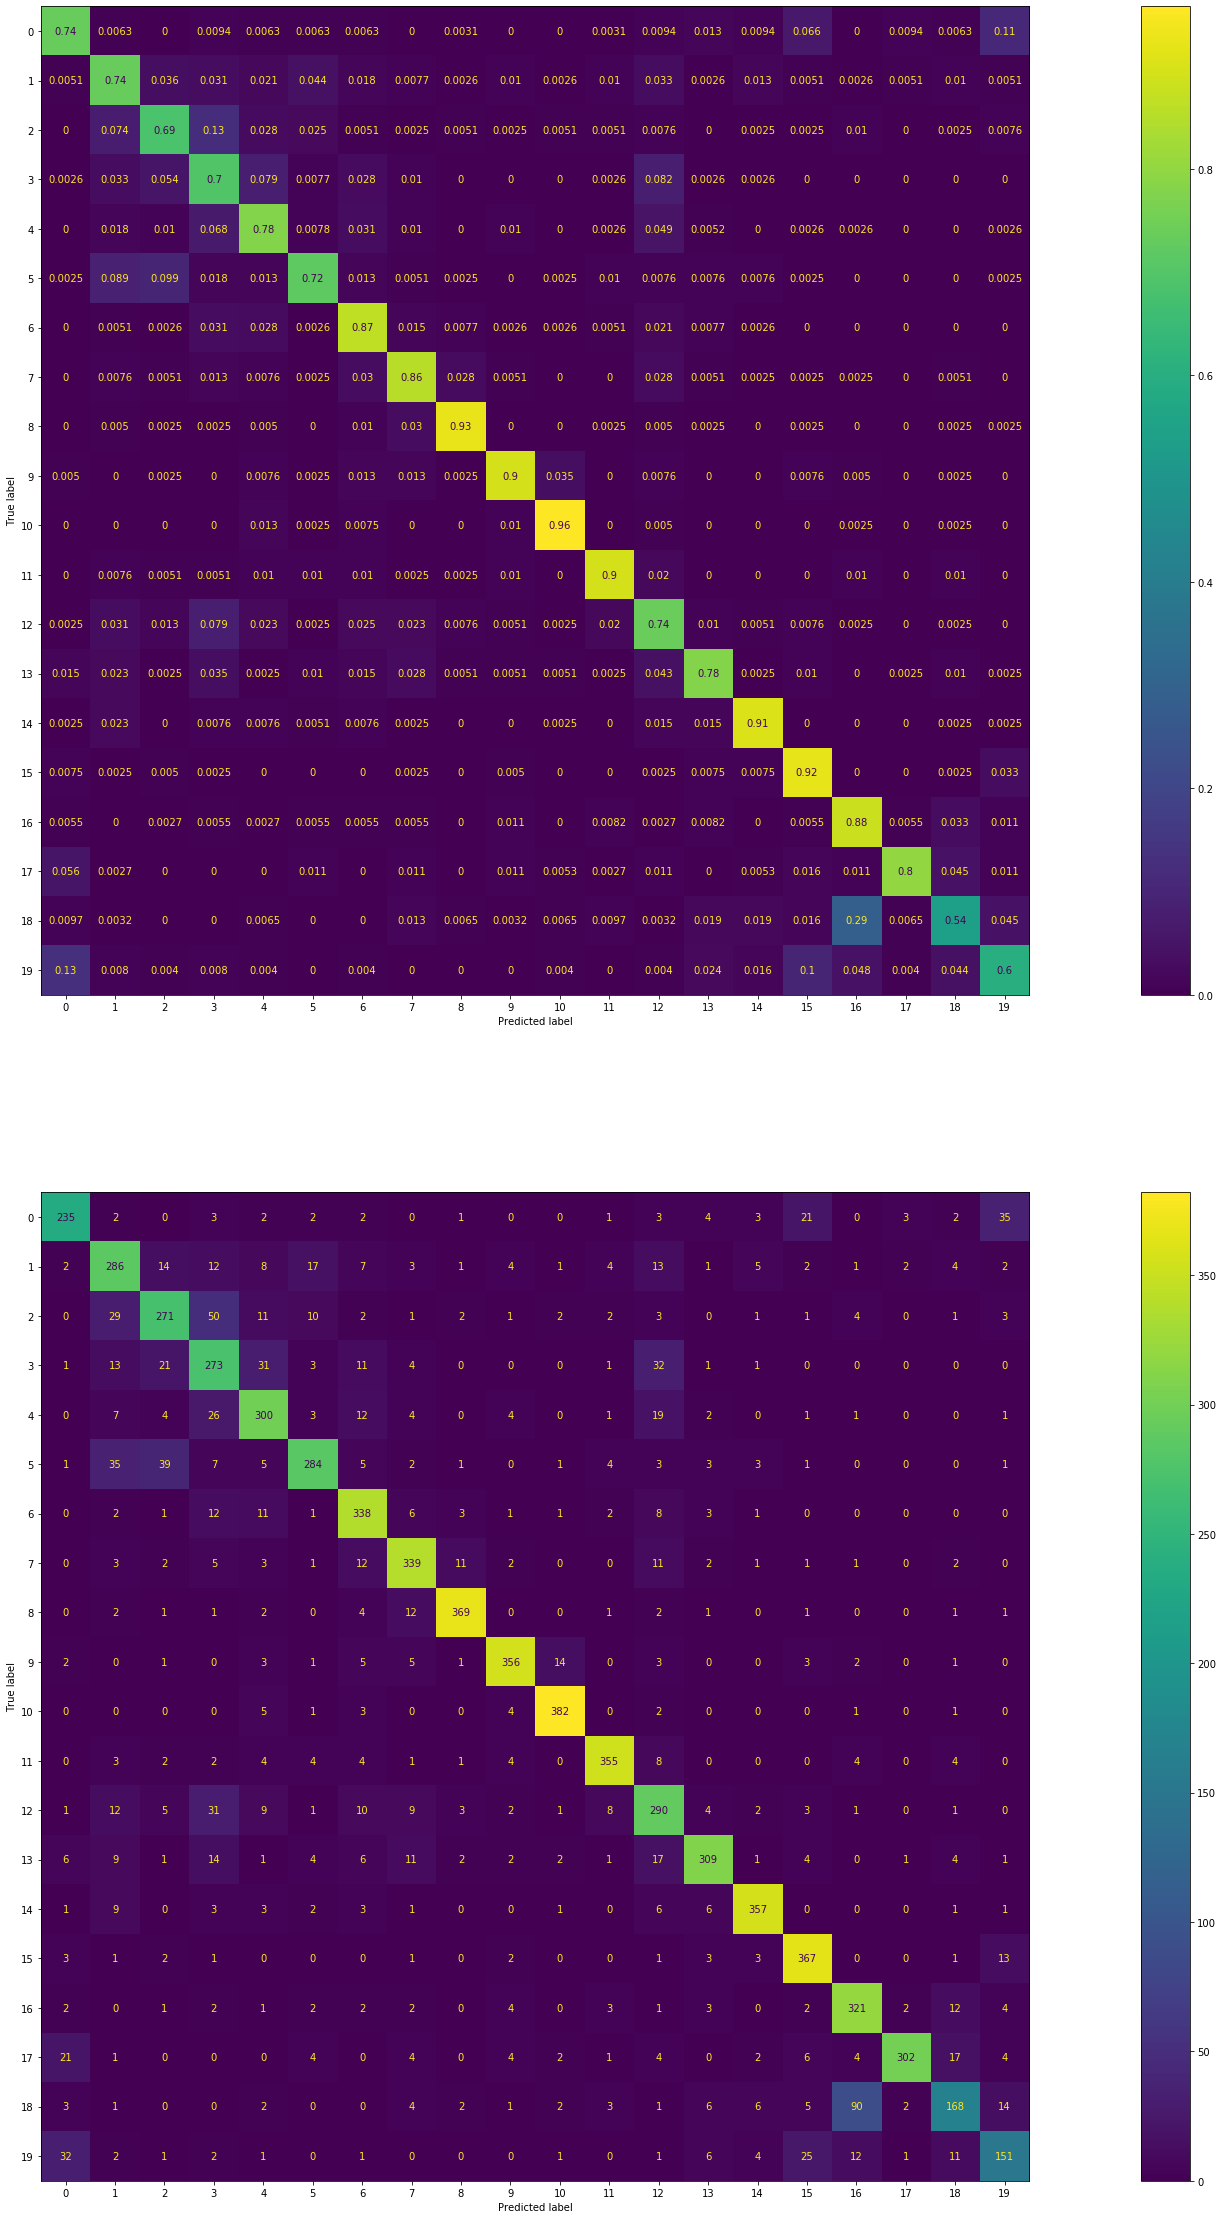

In [28]:
task_9()

# Чаще всего путаются классы 16 и 18

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [38]:
from xgboost import XGBClassifier

def task_10():
    f1 = make_scorer(f1_score , average='macro')
    params = {
        'n_estimators': [50, 100, 150],
        'max_depth': range(3, 11, 3),
        'learning_rate':[0.001, 0.09, 0.2]
    }
    clf = XGBClassifier()
    grid = GridSearchCV(clf, params, scoring=f1, cv=3, verbose=3)
    grid.fit(X_train, y_train)
    print(grid.best_params_, grid.best_score_)
    clf = XGBClassifier(**grid.best_params_)
    clf.fit(X_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))
    print("F1_macro: ", f1_score(y_test, clf.predict(X_test), average='macro'))
    print("F1_micro: ", f1_score(y_test, clf.predict(X_test), average='micro'))
    return clf, grid.best_params_

In [39]:
task_10()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.627 total time=   9.1s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.643 total time=   9.1s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.649 total time=   9.4s
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.646 total time=  18.6s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.655 total time=  19.2s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.659 total time=  19.4s
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=0.656 total time=  28.6s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=0.667 total time=  28.5s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=0.673 total time=  29.3s
[CV 1/3] END learning_rate=0.001, max_depth=6, n_estimators=50;, scor

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=150,
               n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
               predictor='auto', random_state=0, reg_alpha=0, ...),
 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150})

In [40]:
params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
clf = XGBClassifier(**params)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

# Большее влияние на качество обучение повлиял параметр 'n_esimators', меньшее - 'max_depth'

__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [24]:
from collections import defaultdict
from tqdm import tqdm

In [76]:
keys = dict_.keys()

def task_11():
    dict_my = defaultdict(int)
    for val in tqdm(new_df['pp_text']):
        temp_val = []
        for elem in val:
            if elem in keys:
                temp_val.append(elem)
        for i in range(len(temp_val) - 9):
            sl = temp_val[i: i + 10]
            for k in range(10):
                for j in range(k + 1, 10):
                    fs = frozenset([sl[k], sl[j]])
                    if len(fs) != 2:
                        continue
                    dict_my[fs] += 1
    return dict_my

In [77]:
my_dict = task_11()

100%|███████████████████████████████████████████████████████████████████████████| 18846/18846 [02:17<00:00, 137.18it/s]


In [78]:
len(my_dict)

7949501

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [86]:
from networkx import Graph
from networkx.algorithms import community

def task_12():
    graph = Graph()
    edges = []
    T = 200
    for val in my_dict.keys():
        if my_dict[val] > T:
            edges.append(tuple(val))
    graph.add_edges_from(edges)
    c = community.greedy_modularity_communities(graph)
    return c

In [87]:
c = task_12()

In [111]:
c_new = list(filter(lambda x: (len(x) > 2 and len(x) < 8) , c))

In [112]:
#list(enumerate(c_new))

In [113]:
c_new[0], c_new[3], c_new[53], c_new[4]

(frozenset({'chinese',
            'msg',
            'reaction',
            'restaurant',
            'sensitivity',
            'superstition',
            'syndrome'}),
 frozenset({'agnostics',
            'atheists',
            'economic',
            'leaders',
            'political',
            'social',
            'theists'}),
 frozenset({'detector', 'detectors', 'radar'}),
 frozenset({'agencies',
            'dollars',
            'federal',
            'income',
            'sales',
            'tax',
            'vat'}))